In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV

In [2]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

## Discretization using Decision Trees

In [4]:
# example: build Regression tree using LSTAT to predict MEDV

tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)

tree_model.fit(X_train['LSTAT'].to_frame(), y_train)

X_train['lstat_tree'] = tree_model.predict(X_train['LSTAT'].to_frame())

X_train[['LSTAT', 'lstat_tree']].head(10)

,LSTAT,lstat_tree
141,34.41,12.917241
272,7.73,27.153846
135,16.96,16.361818
298,4.97,32.042857
122,17.93,16.361818
22,18.72,16.361818
68,13.09,20.555000
20,21.02,12.917241
437,26.45,12.917241
14,10.26,20.555000


In [5]:
# let's explore how many end points (the bins) the tree created

X_train['lstat_tree'].nunique()

8

In [6]:
# let's explore which end points (the predictions) the tree created

X_train['lstat_tree'].unique()

array([12.91724138, 27.15384615, 16.36181818, 32.04285714, 20.555     ,
       34.88333333, 23.71388889, 41.80740741])

Text(0, 0.5, 'MEDV')

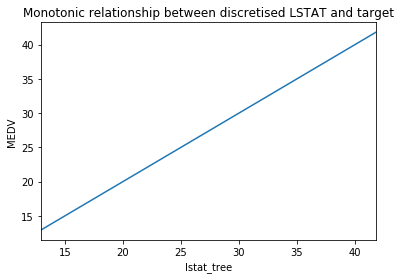

In [7]:
# monotonic relationship with target: train set

pd.concat([X_train, y_train], axis=1).groupby(['lstat_tree'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

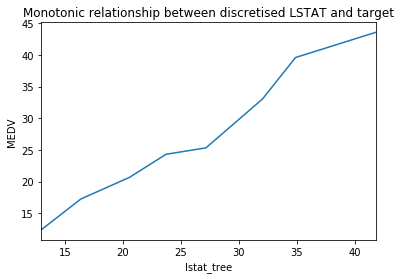

In [8]:
# monotonic relationship with target: test set

X_test['lstat_tree'] = tree_model.predict(X_test['LSTAT'].to_frame())

pd.concat([X_test, y_test], axis=1).groupby(['lstat_tree'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

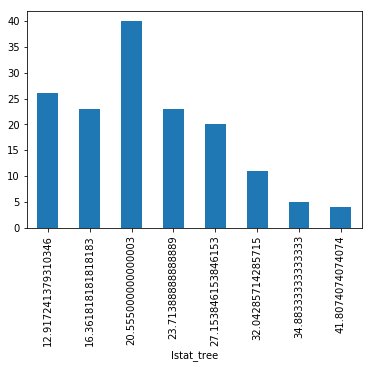

In [9]:
# plot number of observations per bin

X_test.groupby(['lstat_tree'])['LSTAT'].count().plot.bar()

In [10]:
# we can go ahead and visualise the tree by saving the model to a file,

with open("tree_model.txt", "w") as f:
    f = export_graphviz(tree_model, out_file=f)

# and opening that file in the below indicated link:

# go here to open the file: http://webgraphviz.com

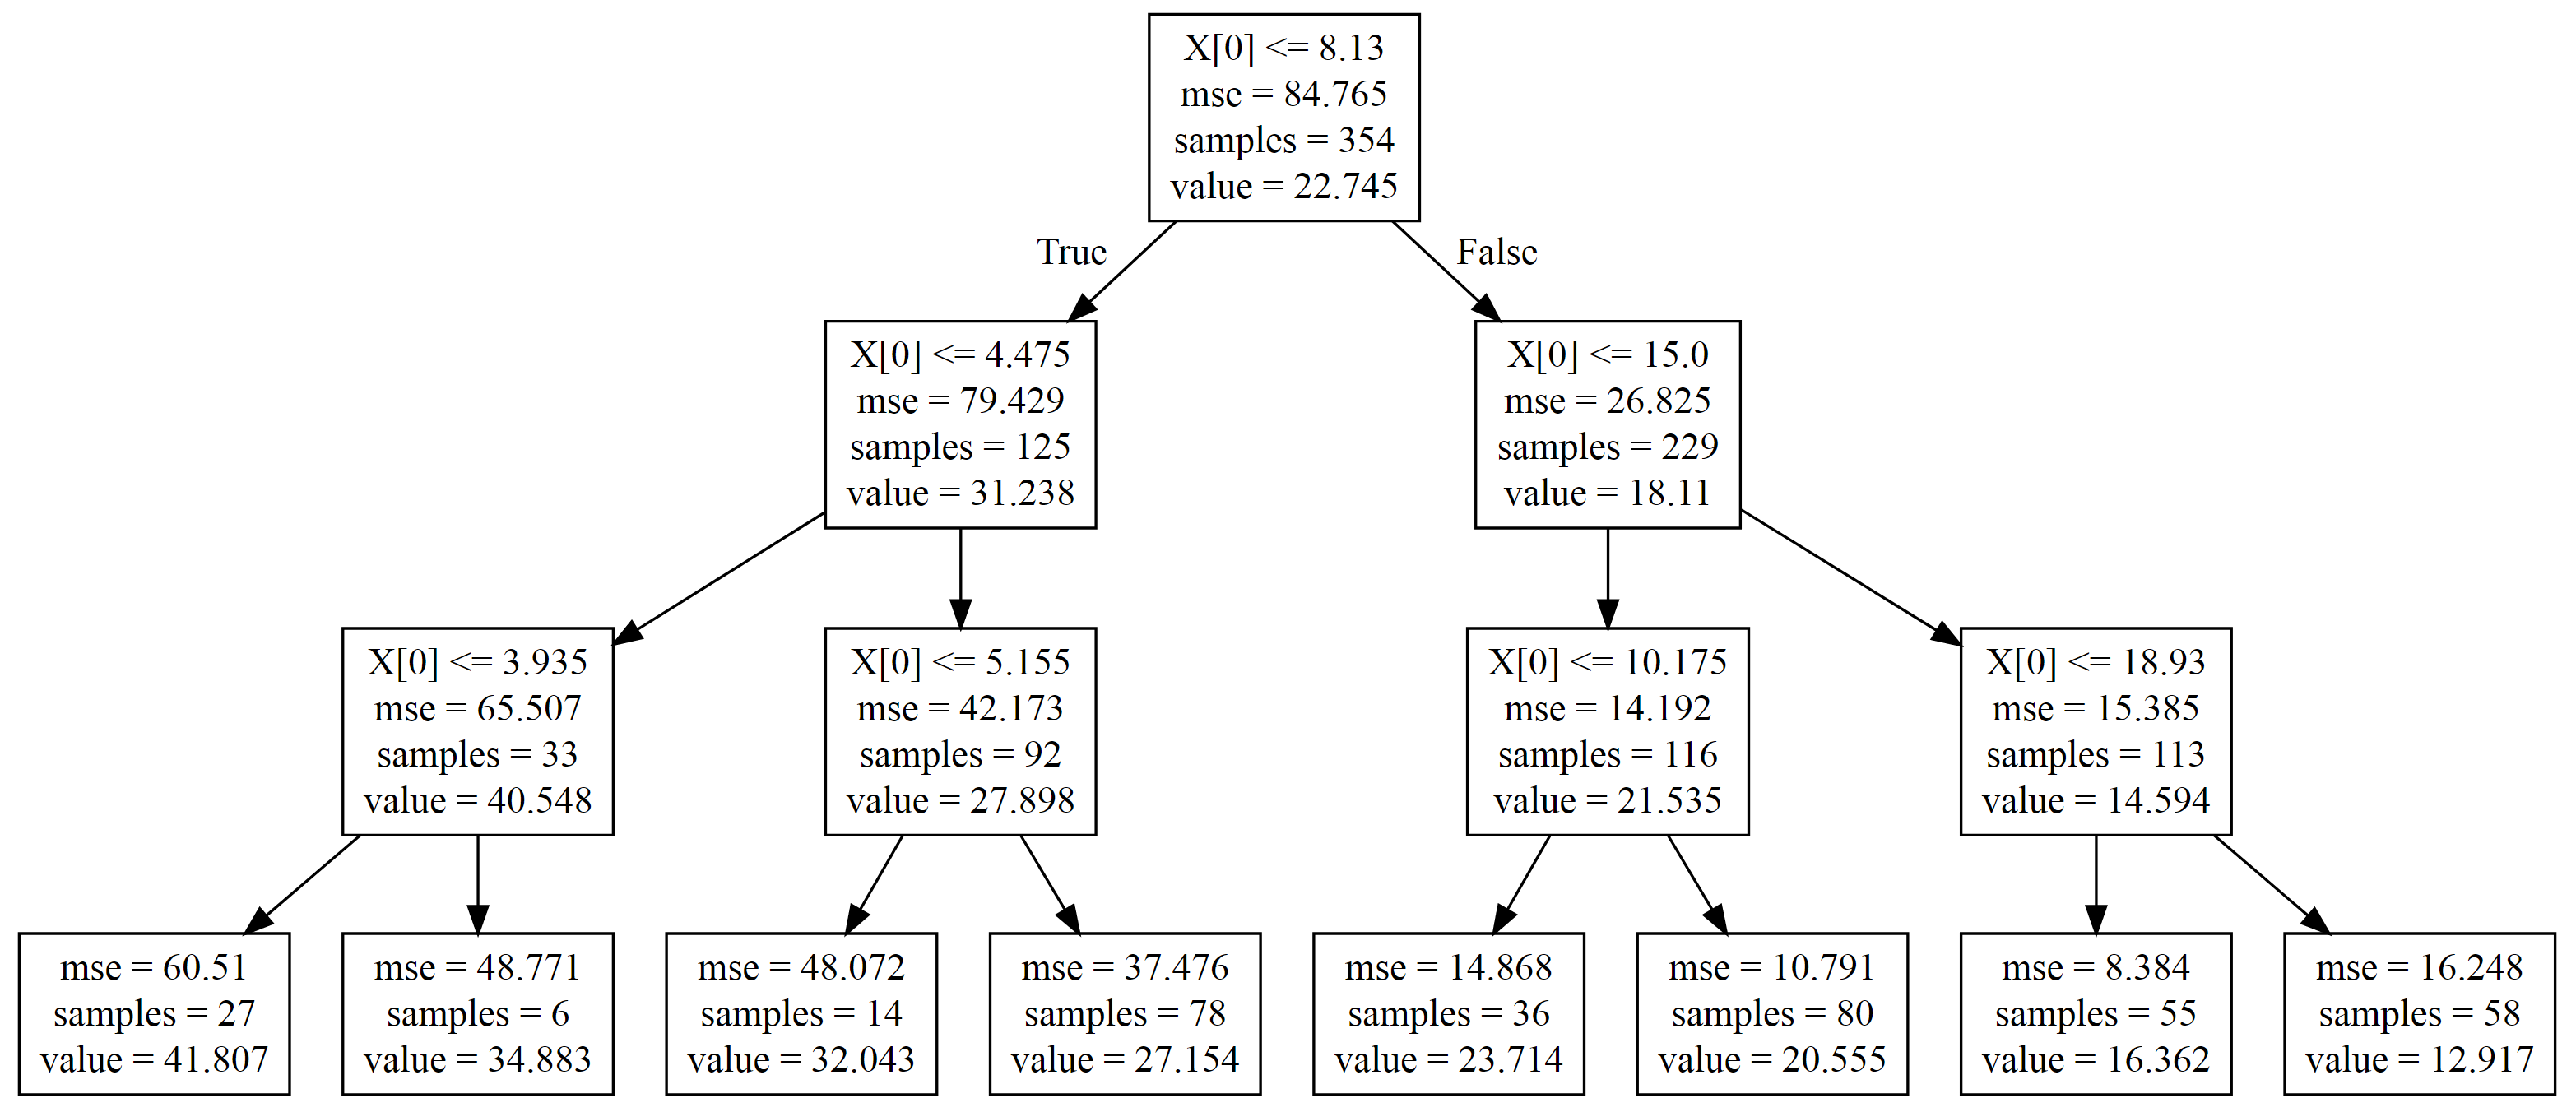

In [11]:
# this is what you should see if you do what is described in the previous cell

# I saved the image you should retrieve in the server above into a png, and then load
# it here to smooth the demo

# the  plot indicates  the age cut-offs at each node, and also the number of samples at each node, and 
# the mse

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "tree_model.png"
Image(filename = PATH , width=1000, height=1000)

## Decision Tree with hyper-parameter tunning

In [12]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [13]:
param_grid = {'max_depth': [1,2,3,4]}

In [14]:
# set up model within GridSearch with the parameters to optimize
# the metric to optimize and the fold cross-validation

tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0),
                          cv = 5, 
                          scoring = 'neg_mean_squared_error',
                          param_grid = param_grid)

In [15]:
# fit the grid - finds tree with optimal parameters for LSTAT

tree_model.fit(X_train['LSTAT'].to_frame(), y_train)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [16]:
# find predictions / discretize the variable

X_train['lstat_tree'] = tree_model.predict(X_train['LSTAT'].to_frame())
X_test['lstat_tree'] = tree_model.predict(X_test['LSTAT'].to_frame())

## Decision Tree discretization with Feature-engine

In [17]:
from feature_engine.discretisers import DecisionTreeDiscretiser

In [18]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [19]:
# set up the decision tree discretiser indicating:
# cross-validation number (cv)
# how to evaluate model performance (scoring)
# the variables we want to discretise (variables)
# whether it is a target for regression or classification
# and the grid with the parameters we want to test

treeDisc = DecisionTreeDiscretiser(cv=10, scoring='neg_mean_squared_error',
                                   variables=['LSTAT', 'RM', 'DIS'],
                                   regression=True,
                                   param_grid={'max_depth': [1,2,3,4]})

treeDisc.fit(X_train, y_train)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeDiscretiser(cv=10, param_grid={'max_depth': [1, 2, 3, 4]},
                        random_state=None, regression=True,
                        scoring='neg_mean_squared_error',
                        variables=['LSTAT', 'RM', 'DIS'])

In [20]:
# we can inspect the best parameters found for the tree for LSTAT

treeDisc.binner_dict_['LSTAT'].best_params_

{'max_depth': 3}

In [21]:
# and the parameters for each tree here:

treeDisc.binner_dict_

{'LSTAT': GridSearchCV(cv=10, error_score='raise-deprecating',
              estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
              iid='warn', n_jobs=None, param_grid={'max_depth': [1, 2, 3, 4]},
              pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
              scoring='neg_mean_squared_error', verbose=0),
 'RM': GridSe

In [22]:
# the scores for the tree here
treeDisc.scores_dict_['LSTAT']

-23.515900045418213

In [23]:
# let's transform the data

train_t = treeDisc.transform(X_train)
test_t = treeDisc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

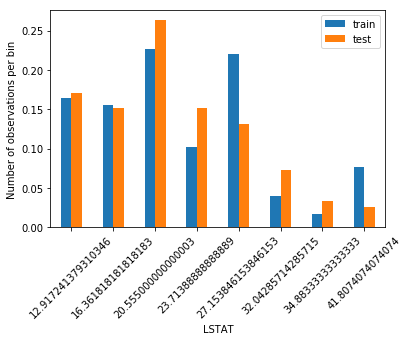

In [24]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'MEDV')

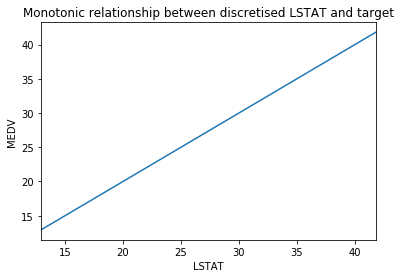

In [25]:
# let's explore the monotonic relationship
pd.concat([train_t, y_train], axis=1).groupby(['LSTAT'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

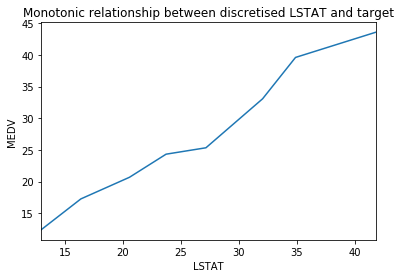

In [26]:
# let's explore the monotonic relationship
pd.concat([test_t, y_test], axis=1).groupby(['LSTAT'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

Text(0, 0.5, 'Number of observations per bin')

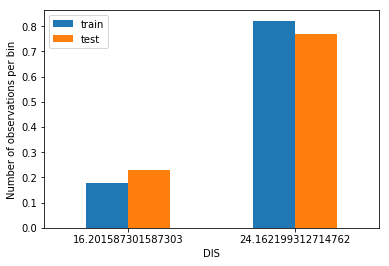

In [27]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

#LSTAT

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

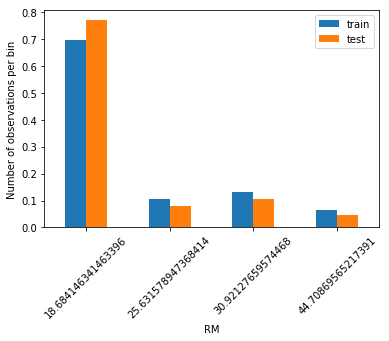

In [28]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

#RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')